In [1]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import pickle

Matplotlib created a temporary config/cache directory at /scratch/slurm-job.500149/matplotlib-xuvjwoha because the default path (/cluster/customapps/biomed/grlab/users/prelotla/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
#base_brca = '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/commit_v3_TEST_96_407e9b5_withannot_conf2_annotFrame_cap0_runs/TCGA_Breast_1102'
base_brca = '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/commit_v3_TEST_ALL_407e9b5_withannot_conf2_annotFrame_cap0_runs/TCGA_Breast_1102'

In [3]:
base_gtex = '/cluster/work/grlab/projects/TCGA/PanCanAtlas/immunopepper_paper/peptides_ccell_rerun_gtex_151220'

In [4]:
#gtex_name = 'GTEX2019_commit_TEST_131_cb328ed_ordered_exclusive_ref_p5_35G_96_5K_pya.0.17.1_conf2_all_ref_chrall_cap'
gtex_name = 'GTEX2019_commit_TEST_130_407e9b5ORDERED_ref_p15_35G_200_pya.0.17.1_conf2_all_ref_chrall_cap'

In [5]:
gene_suffix = 'cohort_mutNone/tmp_out_ref_batch_4678'

# Process GTEX - 1 gene

In [6]:
folder_gtex = os.path.join(base_gtex, gtex_name, gene_suffix)
print(folder_gtex)

/cluster/work/grlab/projects/TCGA/PanCanAtlas/immunopepper_paper/peptides_ccell_rerun_gtex_151220/GTEX2019_commit_TEST_130_407e9b5ORDERED_ref_p15_35G_200_pya.0.17.1_conf2_all_ref_chrall_cap/cohort_mutNone/tmp_out_ref_batch_4678


In [7]:
path_pickle = os.path.join(base_gtex, gtex_name, gene_suffix, 'gene_kmers.pickle')
print(path_pickle)

/cluster/work/grlab/projects/TCGA/PanCanAtlas/immunopepper_paper/peptides_ccell_rerun_gtex_151220/GTEX2019_commit_TEST_130_407e9b5ORDERED_ref_p15_35G_200_pya.0.17.1_conf2_all_ref_chrall_cap/cohort_mutNone/tmp_out_ref_batch_4678/gene_kmers.pickle


In [8]:
list_gtex_Junc = glob.glob(os.path.join(folder_gtex, 'ref_graph_kmer_JuncExpr/*'))

In [9]:
list_gtex_Segm = glob.glob(os.path.join(folder_gtex, 'ref_graph_kmer_SegmExpr/*'))

In [10]:
len(list_gtex_Junc)

67

In [11]:
len(list_gtex_Segm)

35

In [12]:
junction_files_kmers = set()
junction_iscrossjx_kmers = set()

for idx, file in enumerate(list_gtex_Junc):
    print('...', idx)
    gtex_Junc = pd.read_csv(file, compression = 'gzip', sep = '\t')
    junction_files_kmers.update(gtex_Junc['kmer'])
    junction_iscrossjx_kmers.update( gtex_Junc.loc[gtex_Junc['isCrossJunction'] == True, 'kmer'] ) 
    

... 0
... 1
... 2
... 3
... 4
... 5
... 6
... 7
... 8
... 9
... 10
... 11
... 12
... 13
... 14
... 15
... 16
... 17
... 18
... 19
... 20
... 21
... 22
... 23
... 24
... 25
... 26
... 27
... 28
... 29
... 30
... 31
... 32
... 33
... 34
... 35
... 36
... 37
... 38
... 39
... 40
... 41
... 42
... 43
... 44
... 45
... 46
... 47
... 48
... 49
... 50
... 51
... 52
... 53
... 54
... 55
... 56
... 57
... 58
... 59
... 60
... 61
... 62
... 63
... 64
... 65
... 66


In [13]:
segment_files_kmers = set()
segment_notcrossseg_kmers = set()

for idx, file in enumerate(list_gtex_Segm):
    print('...',idx)
    gtex_Segm = pd.read_csv(file, compression = 'gzip', sep = '\t')
    segment_files_kmers.update(gtex_Segm['kmer'])
    segment_notcrossseg_kmers.update( gtex_Segm.loc[gtex_Segm['isCrossJunction'] == False, 'kmer'] ) 

... 0
... 1
... 2
... 3
... 4
... 5
... 6
... 7
... 8
... 9
... 10
... 11
... 12
... 13
... 14
... 15
... 16
... 17
... 18
... 19
... 20
... 21
... 22
... 23
... 24
... 25
... 26
... 27
... 28
... 29
... 30
... 31
... 32
... 33
... 34


In [14]:
len(junction_files_kmers)


4597

In [15]:
len(junction_iscrossjx_kmers)

1229

In [16]:
len(segment_files_kmers)


4597

In [17]:
len(segment_notcrossseg_kmers)

4015

In [18]:
Object_save = {'junction_iscrossjx_kmers':junction_iscrossjx_kmers, 
              'segment_notcrossseg_kmers': segment_notcrossseg_kmers, 
              'list_gtex_Junc': list_gtex_Junc, 
              'list_gtex_Segm': list_gtex_Segm}

In [19]:
with open(path_pickle, 'wb') as handle:
    pickle.dump(Object_save, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [20]:
gtex_Junc.head()


,kmer,isCrossJunction,junctionAnnotated,readFrameAnnotated,SRR1068687all,SRR1068788all,SRR1068808all,SRR1068832all,SRR1068855all,SRR1068880all,...,SRR821626all,SRR821653all,SRR821666all,SRR821690all,SRR821715all,SRR821846all,SRR823967all,SRR823991all,SRR824015all,SRR824039all
0,SWMRAKADP,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SWMRAKADP,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SAFILPSLP,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MRAKADPPL,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MRAKADPPL,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Process Brca - 1 gene 

In [21]:
# ADD THE ANNOTATION REMOVAL

In [22]:
path_brca = os.path.join(base_brca, gene_suffix)
print(path_brca)

/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/commit_v3_TEST_ALL_407e9b5_withannot_conf2_annotFrame_cap0_runs/TCGA_Breast_1102/cohort_mutNone/tmp_out_ref_batch_4678


In [23]:
path_brca_pickle = os.path.join (base_brca, gene_suffix, 'junction_res_unfiltered.pickle')
print(path_brca_pickle)

/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/commit_v3_TEST_ALL_407e9b5_withannot_conf2_annotFrame_cap0_runs/TCGA_Breast_1102/cohort_mutNone/tmp_out_ref_batch_4678/junction_res_unfiltered.pickle


In [24]:
list_brca_Junc = glob.glob(os.path.join(path_brca, 'ref_graph_kmer_JuncExpr/*'))

In [25]:
list_brca_Segm = glob.glob(os.path.join(path_brca, 'ref_graph_kmer_SegmExpr/*'))

In [26]:
len(list_brca_Junc)

2

In [27]:
brca_junction_files_kmers = set()
brca_junction_iscrossjx_kmers = set()
brca_Junc_all = []

for idx, file in enumerate(list_brca_Junc):
    print('...', idx)
    brca_Junc = pd.read_csv(file, compression = 'gzip', sep = '\t')
    brca_junction_files_kmers.update(brca_Junc['kmer'])
    brca_junction_iscrossjx_kmers.update( brca_Junc.loc[brca_Junc['isCrossJunction'] == True, 'kmer'] ) 
    brca_Junc_all.append(brca_Junc)

... 0
... 1


In [28]:
res = pd.concat(brca_Junc_all)

res = res.set_index('kmer')

In [29]:
res.head()

,isCrossJunction,junctionAnnotated,readFrameAnnotated,TCGA3CAAAU01A11RA41B07all,TCGA3CAALI01A11RA41B07all,TCGA3CAALJ01A31RA41B07all,TCGA3CAALK01A11RA41B07all,TCGA4HAAAK01A12RA41B07all,TCGA5LAAT001A12RA41B07all,TCGA5LAAT101A12RA41B07all,...,TCGAULAAZ601A11RA41B07all,TCGAUUA93S01A21RA41B07all,TCGAV7A7HQ01A11RA33J07all,TCGAW8A86G01A21RA36F07all,TCGAWTAB4101A11RA41B07all,TCGAWTAB4401A11RA41B07all,TCGAXXA89901A11RA36F07all,TCGAXXA89A01A11RA36F07all,TCGAZ7A8R501A42RA41B07all,TCGAZ7A8R601A11RA41B07all
kmer,,,,,,,,,,,,,,,,,,,,,
AERGPPVRG,True,False,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
VRGGEFYGR,True,False,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GEFYGRGAP,True,False,True,16.0,19.0,13.0,25.0,33.0,19.0,13.0,...,20.0,48.0,54.0,40.0,30.0,23.0,28.0,20.0,56.0,63.0
PPVRGGGTL,True,False,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GGGRSAHLL,True,True,True,460.0,198.0,204.0,358.0,289.0,252.0,162.0,...,487.0,358.0,1011.0,465.0,798.0,397.0,278.0,183.0,440.0,323.0


In [30]:
len(brca_junction_files_kmers)


480

In [31]:
len(brca_junction_iscrossjx_kmers)

219

In [32]:
with open(path_brca_pickle, 'wb') as handle:
    pickle.dump(res, handle, protocol=pickle.HIGHEST_PROTOCOL)

## Make difference

In [33]:
all_gtex = junction_iscrossjx_kmers.union(segment_notcrossseg_kmers)
keep = brca_junction_iscrossjx_kmers.difference(all_gtex)

In [34]:
len(keep)

37

# Subset Explratory 

In [35]:
res.head()

,isCrossJunction,junctionAnnotated,readFrameAnnotated,TCGA3CAAAU01A11RA41B07all,TCGA3CAALI01A11RA41B07all,TCGA3CAALJ01A31RA41B07all,TCGA3CAALK01A11RA41B07all,TCGA4HAAAK01A12RA41B07all,TCGA5LAAT001A12RA41B07all,TCGA5LAAT101A12RA41B07all,...,TCGAULAAZ601A11RA41B07all,TCGAUUA93S01A21RA41B07all,TCGAV7A7HQ01A11RA33J07all,TCGAW8A86G01A21RA36F07all,TCGAWTAB4101A11RA41B07all,TCGAWTAB4401A11RA41B07all,TCGAXXA89901A11RA36F07all,TCGAXXA89A01A11RA36F07all,TCGAZ7A8R501A42RA41B07all,TCGAZ7A8R601A11RA41B07all
kmer,,,,,,,,,,,,,,,,,,,,,
AERGPPVRG,True,False,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
VRGGEFYGR,True,False,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GEFYGRGAP,True,False,True,16.0,19.0,13.0,25.0,33.0,19.0,13.0,...,20.0,48.0,54.0,40.0,30.0,23.0,28.0,20.0,56.0,63.0
PPVRGGGTL,True,False,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GGGRSAHLL,True,True,True,460.0,198.0,204.0,358.0,289.0,252.0,162.0,...,487.0,358.0,1011.0,465.0,798.0,397.0,278.0,183.0,440.0,323.0


In [36]:
res_filtered = res.loc[keep, :]

In [37]:
res_filtered.head()


,isCrossJunction,junctionAnnotated,readFrameAnnotated,TCGA3CAAAU01A11RA41B07all,TCGA3CAALI01A11RA41B07all,TCGA3CAALJ01A31RA41B07all,TCGA3CAALK01A11RA41B07all,TCGA4HAAAK01A12RA41B07all,TCGA5LAAT001A12RA41B07all,TCGA5LAAT101A12RA41B07all,...,TCGAULAAZ601A11RA41B07all,TCGAUUA93S01A21RA41B07all,TCGAV7A7HQ01A11RA33J07all,TCGAW8A86G01A21RA36F07all,TCGAWTAB4101A11RA41B07all,TCGAWTAB4401A11RA41B07all,TCGAXXA89901A11RA36F07all,TCGAXXA89A01A11RA36F07all,TCGAZ7A8R501A42RA41B07all,TCGAZ7A8R601A11RA41B07all
kmer,,,,,,,,,,,,,,,,,,,,,
GPPVRGGEF,True,False,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PPVRGGGRS,True,True,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PVRGGGRSA,True,True,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RGPPVRGGA,True,False,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RGPPVRGGA,True,False,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
res_filtered.shape

(47, 1105)

## Plot Exploratory

In [39]:
brca_cols = [ col for col in res_filtered.columns if 'TCGA' in col]

In [40]:
operations_all = res.loc[:, brca_cols]

operations_all['mean'] = operations_all.mean(axis = 1)

operations_all['recurrence'] = operations_all[operations_all > 0].sum(axis = 1)

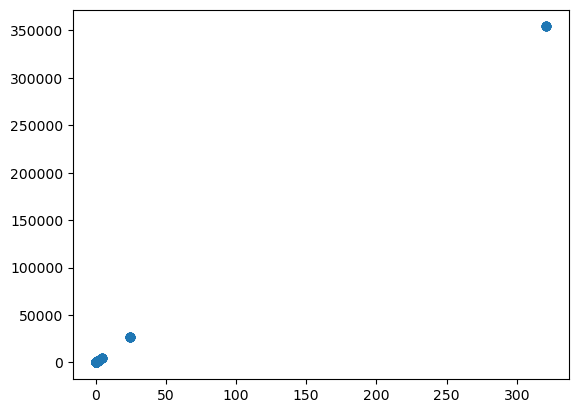

In [41]:
plt.scatter(operations_all['mean'], operations_all['recurrence'])
plt.show()

In [42]:
operations = res_filtered.loc[:, brca_cols]

operations['mean'] = operations.mean(axis = 1)

operations['recurrence'] = operations[operations > 0].sum(axis = 1)

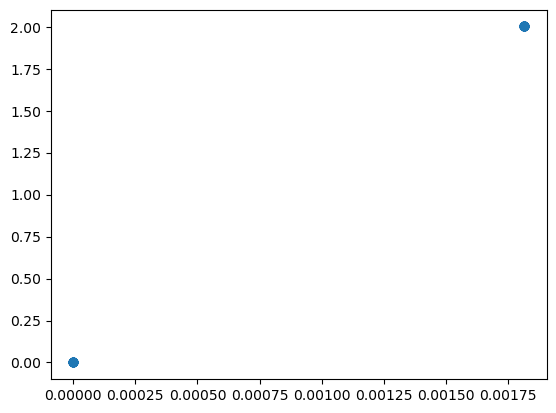

In [43]:
plt.scatter(operations['mean'], operations['recurrence'])
plt.show()

In [44]:
operations

,TCGA3CAAAU01A11RA41B07all,TCGA3CAALI01A11RA41B07all,TCGA3CAALJ01A31RA41B07all,TCGA3CAALK01A11RA41B07all,TCGA4HAAAK01A12RA41B07all,TCGA5LAAT001A12RA41B07all,TCGA5LAAT101A12RA41B07all,TCGA5TA9QA01A11RA41B07all,TCGAA1A0SB01A11RA14407all,TCGAA1A0SD01A11RA11507all,...,TCGAV7A7HQ01A11RA33J07all,TCGAW8A86G01A21RA36F07all,TCGAWTAB4101A11RA41B07all,TCGAWTAB4401A11RA41B07all,TCGAXXA89901A11RA36F07all,TCGAXXA89A01A11RA36F07all,TCGAZ7A8R501A42RA41B07all,TCGAZ7A8R601A11RA41B07all,mean,recurrence
kmer,,,,,,,,,,,,,,,,,,,,,
GPPVRGGEF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001815,2.001815
PPVRGGGRS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001815,2.001815
PVRGGGRSA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001815,2.001815
RGPPVRGGA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001815,2.001815
RGPPVRGGA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001815,2.001815
NEDGSPNLS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001815,2.001815
LWMWEARQG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
SLWMWEARQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
PNLSCKTGC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001815,2.001815


GPPVRGGEF
1
recurrence 1
mean 0.0018148820326678765
min 0.0
max 2.0
[0.0 0.0 0.0 ... 0.0 0.0 0.0]


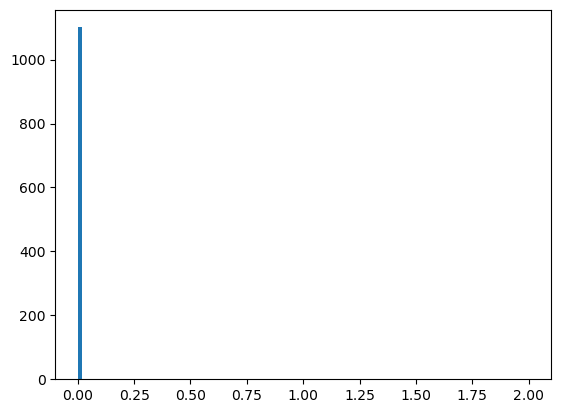

PPVRGGGRS
2
recurrence 1
mean 0.0018148820326678765
min 0.0
max 2.0
[0.0 0.0 0.0 ... 0.0 0.0 0.0]


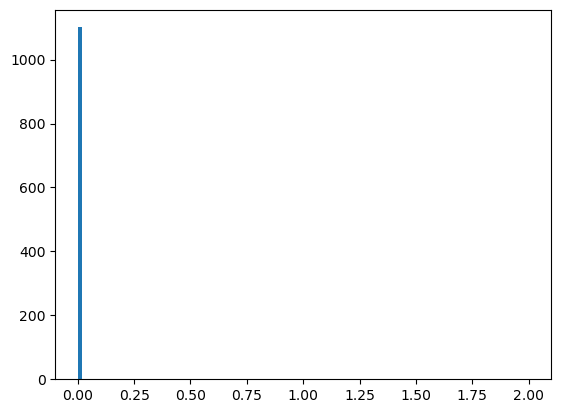

PVRGGGRSA
3
recurrence 1
mean 0.0018148820326678765
min 0.0
max 2.0
[0.0 0.0 0.0 ... 0.0 0.0 0.0]


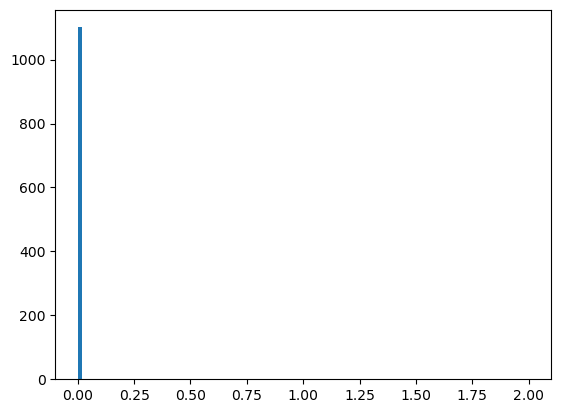

RGPPVRGGA
4
recurrence 1
mean 0.0018148820326678765
min 0.0
max 2.0
[0.0 0.0 0.0 ... 0.0 0.0 0.0]


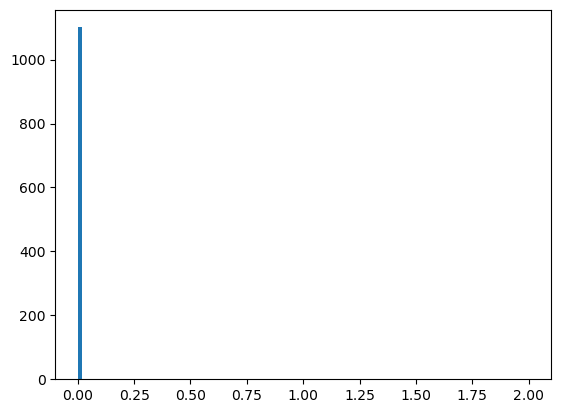

RGPPVRGGA
5
recurrence 1
mean 0.0018148820326678765
min 0.0
max 2.0
[0.0 0.0 0.0 ... 0.0 0.0 0.0]


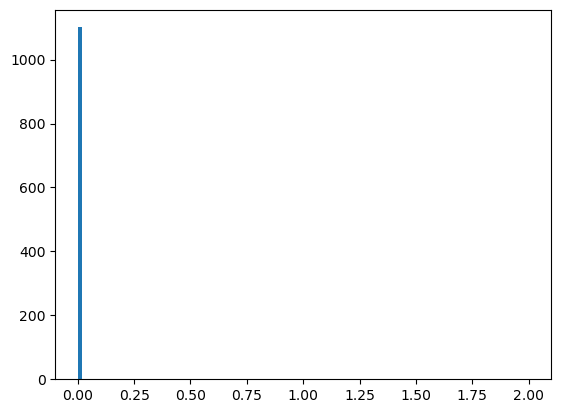

NEDGSPNLS
6
recurrence 1
mean 0.0018148820326678765
min 0.0
max 2.0
[0.0 0.0 0.0 ... 0.0 0.0 0.0]


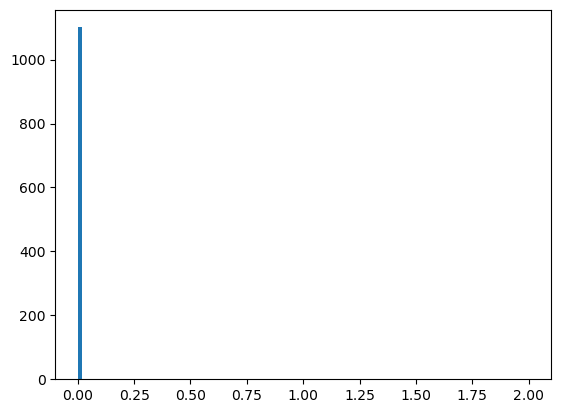

LWMWEARQG
7
recurrence 0
mean 0.0
min 0.0
max 0.0
[0.0 0.0 0.0 ... 0.0 0.0 0.0]


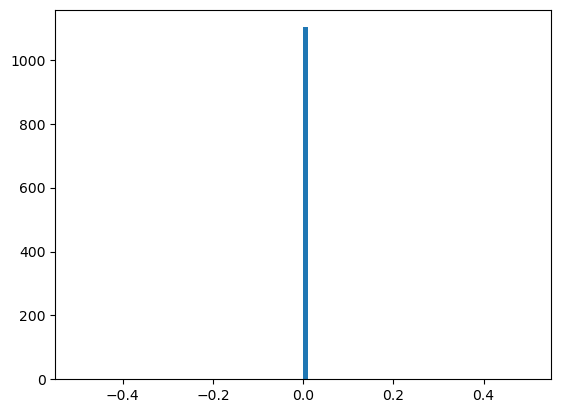

SLWMWEARQ
8
recurrence 0
mean 0.0
min 0.0
max 0.0
[0.0 0.0 0.0 ... 0.0 0.0 0.0]


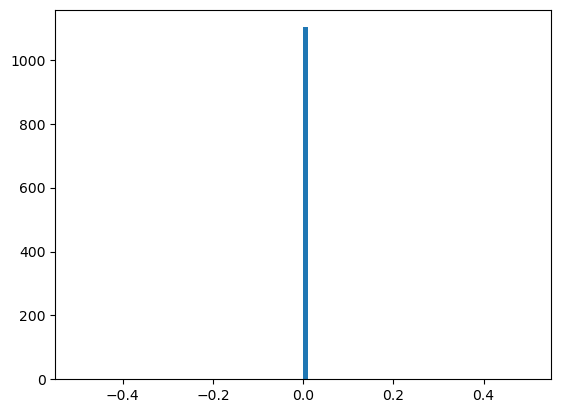

PNLSCKTGC
9
recurrence 1
mean 0.0018148820326678765
min 0.0
max 2.0
[0.0 0.0 0.0 ... 0.0 0.0 0.0]


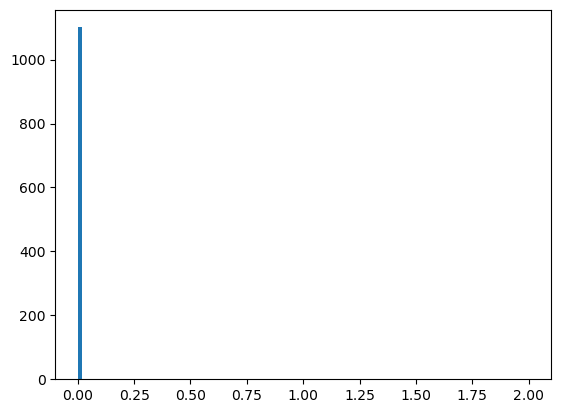

PPVRGGEFY
10
recurrence 1
mean 0.0018148820326678765
min 0.0
max 2.0
[0.0 0.0 0.0 ... 0.0 0.0 0.0]


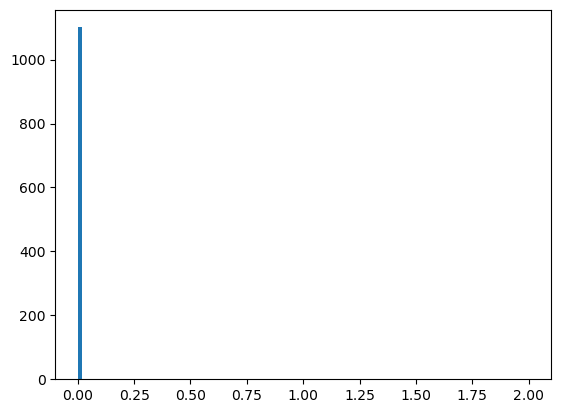

PVRGGGTLQ
11
recurrence 0
mean 0.0
min 0.0
max 0.0
[0.0 0.0 0.0 ... 0.0 0.0 0.0]


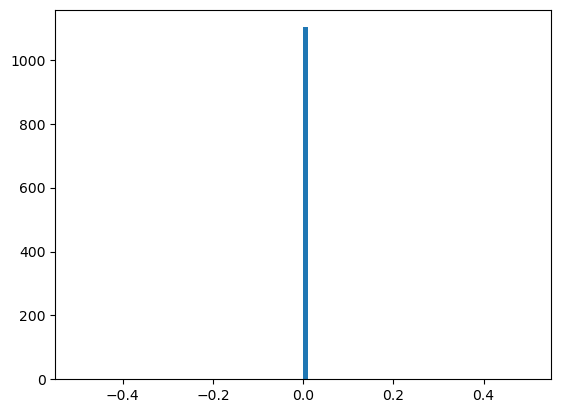

PVRGGGTLQ
12
recurrence 0
mean 0.0
min 0.0
max 0.0
[0.0 0.0 0.0 ... 0.0 0.0 0.0]


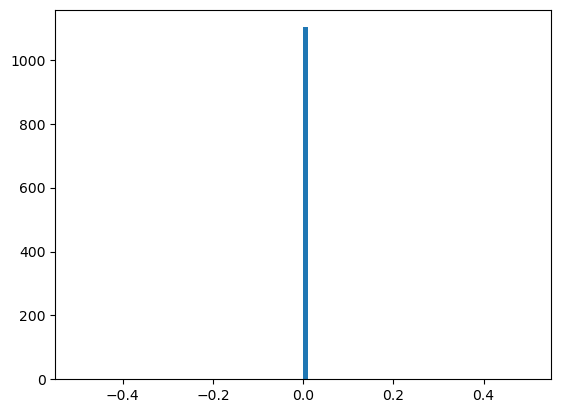

PVRGGEFYG
13
recurrence 1
mean 0.0018148820326678765
min 0.0
max 2.0
[0.0 0.0 0.0 ... 0.0 0.0 0.0]


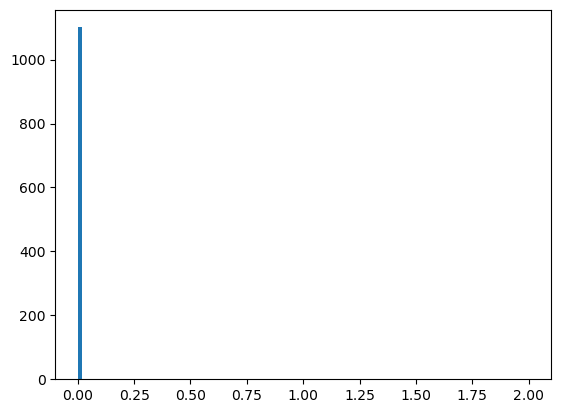

LSCKTGCLE
14
recurrence 1
mean 0.0018148820326678765
min 0.0
max 2.0
[0.0 0.0 0.0 ... 0.0 0.0 0.0]


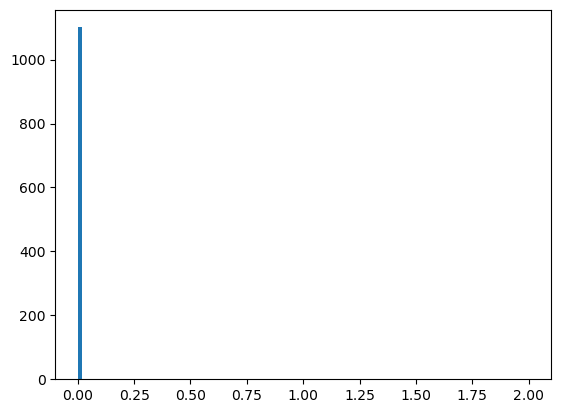

VRGGEFYGR
15
recurrence 1
mean 0.0018148820326678765
min 0.0
max 2.0
[0.0 0.0 0.0 ... 0.0 0.0 0.0]


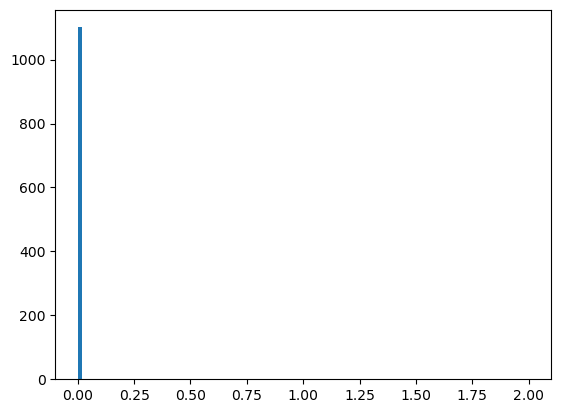

GPPVRGGAS
16
recurrence 1
mean 0.0018148820326678765
min 0.0
max 2.0
[0.0 0.0 0.0 ... 0.0 0.0 0.0]


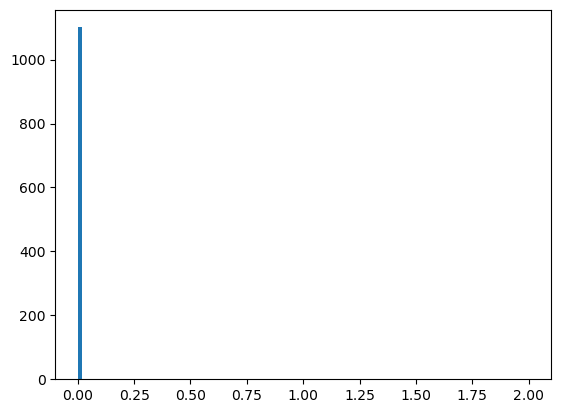

GPPVRGGAS
17
recurrence 1
mean 0.0018148820326678765
min 0.0
max 2.0
[0.0 0.0 0.0 ... 0.0 0.0 0.0]


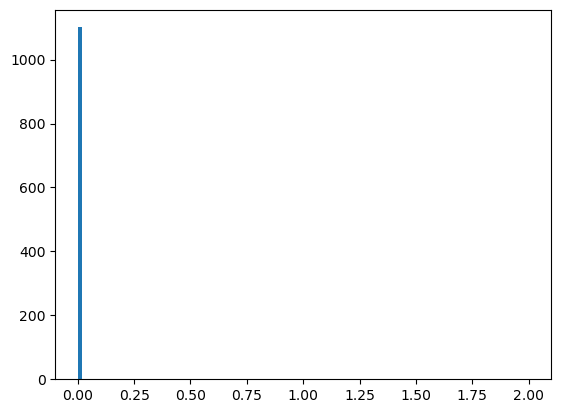

RGPPVRGGG
18
recurrence 1
mean 0.0018148820326678765
min 0.0
max 2.0
[0.0 0.0 0.0 ... 0.0 0.0 0.0]


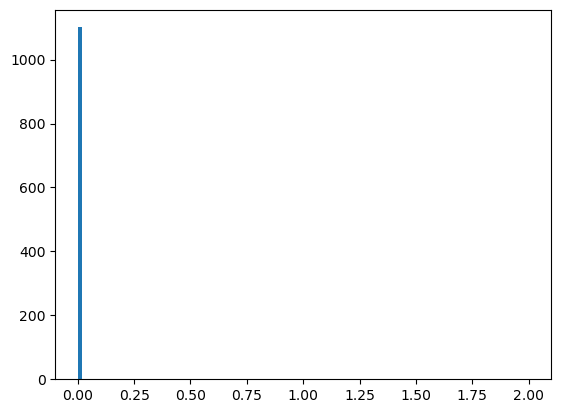

RGPPVRGGG
19
recurrence 0
mean 0.0
min 0.0
max 0.0
[0.0 0.0 0.0 ... 0.0 0.0 0.0]


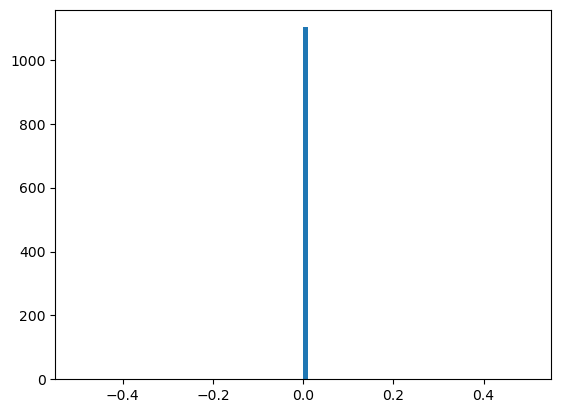

RGPPVRGGG
20
recurrence 0
mean 0.0
min 0.0
max 0.0
[0.0 0.0 0.0 ... 0.0 0.0 0.0]


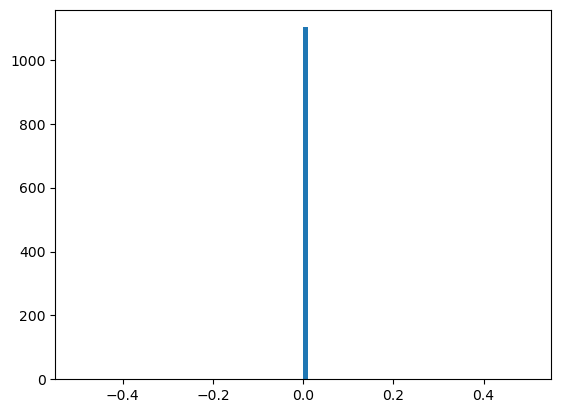

PVRGGASPL
21
recurrence 1
mean 0.0018148820326678765
min 0.0
max 2.0
[0.0 0.0 0.0 ... 0.0 0.0 0.0]


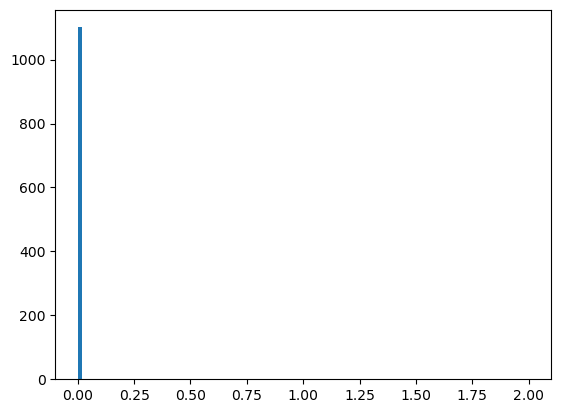

IISLWMWEA
22
recurrence 0
mean 0.0
min 0.0
max 0.0
[0.0 0.0 0.0 ... 0.0 0.0 0.0]


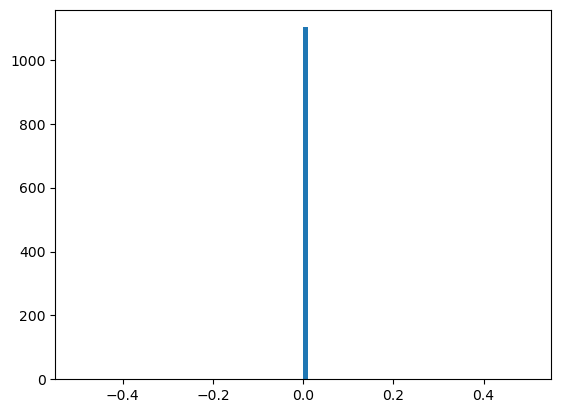

VRGGGTLQL
23
recurrence 0
mean 0.0
min 0.0
max 0.0
[0.0 0.0 0.0 ... 0.0 0.0 0.0]


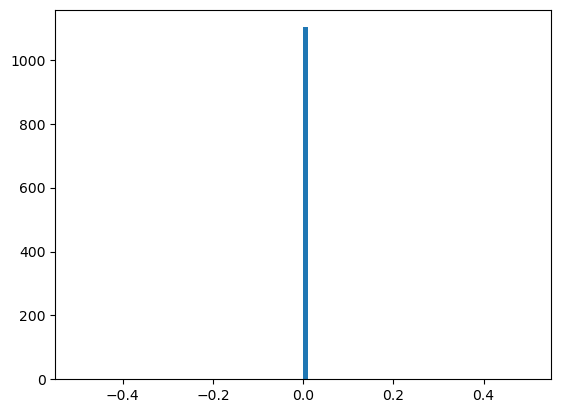

VRGGGTLQL
24
recurrence 0
mean 0.0
min 0.0
max 0.0
[0.0 0.0 0.0 ... 0.0 0.0 0.0]


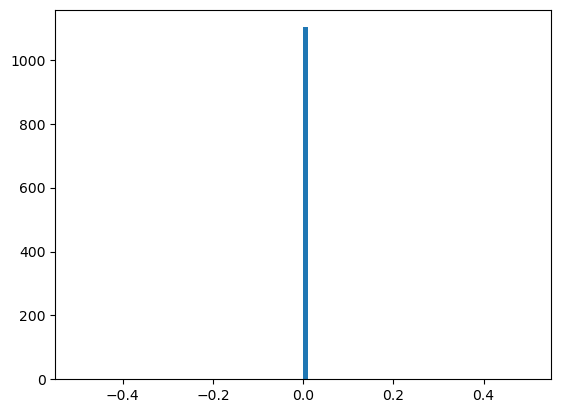

GSPNLSCKT
25
recurrence 1
mean 0.0018148820326678765
min 0.0
max 2.0
[0.0 0.0 0.0 ... 0.0 0.0 0.0]


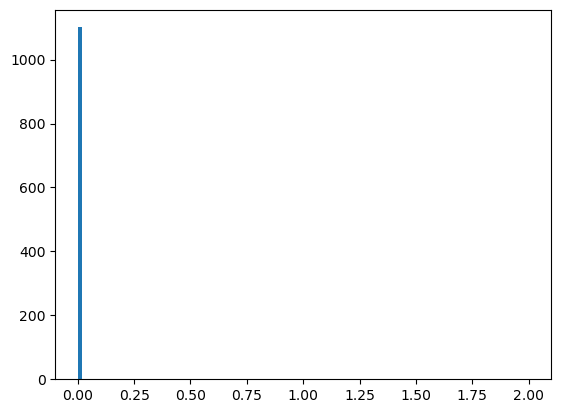

QIISLWMWE
26
recurrence 0
mean 0.0
min 0.0
max 0.0
[0.0 0.0 0.0 ... 0.0 0.0 0.0]


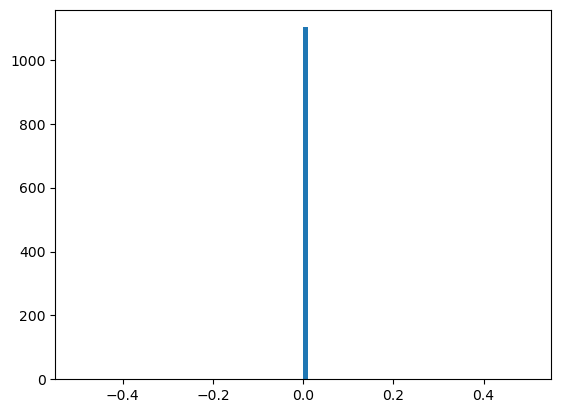

TVSQIISLW
27
recurrence 0
mean 0.0
min 0.0
max 0.0
[0.0 0.0 0.0 ... 0.0 0.0 0.0]


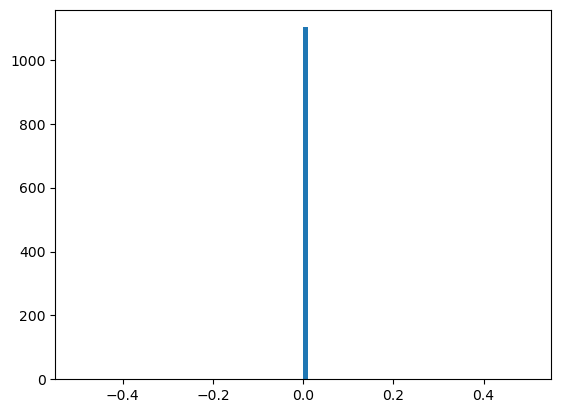

GPPVRGGGR
28
recurrence 1
mean 0.0018148820326678765
min 0.0
max 2.0
[0.0 0.0 0.0 ... 0.0 0.0 0.0]


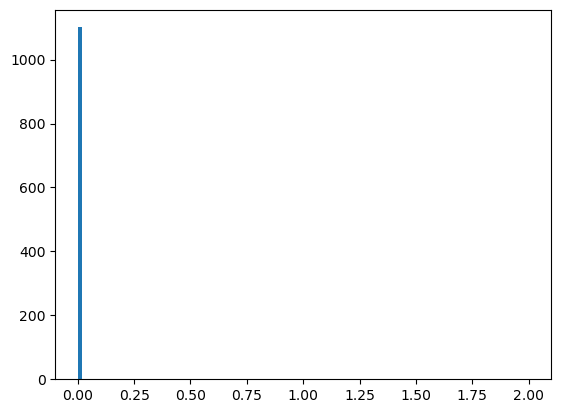

ISLWMWEAR
29
recurrence 0
mean 0.0
min 0.0
max 0.0
[0.0 0.0 0.0 ... 0.0 0.0 0.0]


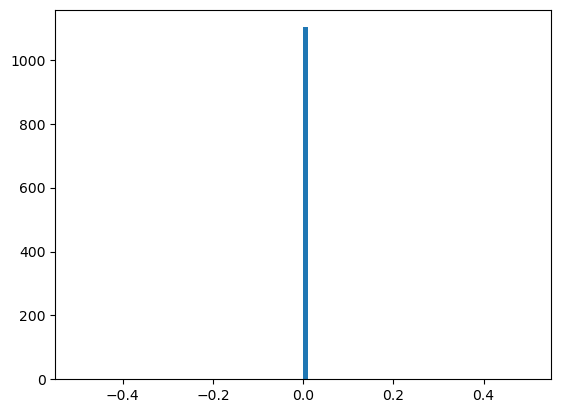

PPVRGGASP
30
recurrence 1
mean 0.0018148820326678765
min 0.0
max 2.0
[0.0 0.0 0.0 ... 0.0 0.0 0.0]


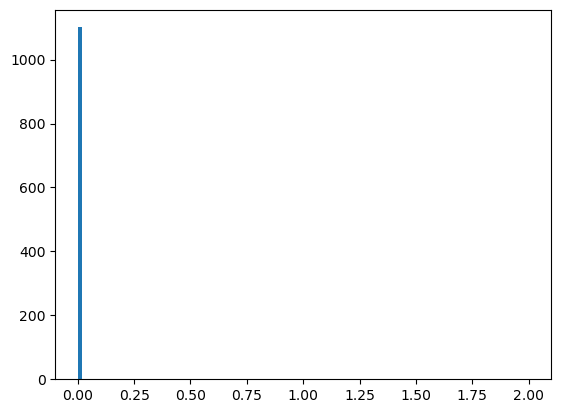

PPVRGGGTL
31
recurrence 0
mean 0.0
min 0.0
max 0.0
[0.0 0.0 0.0 ... 0.0 0.0 0.0]


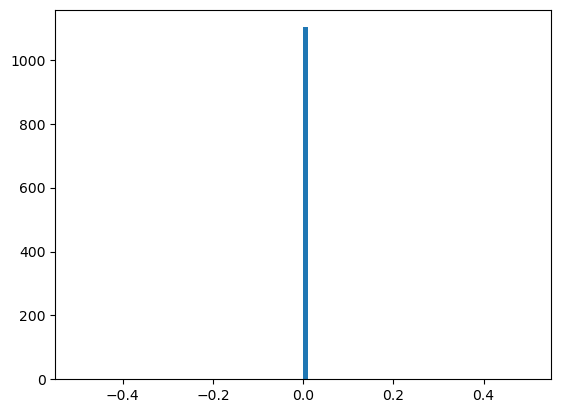

PPVRGGGTL
32
recurrence 0
mean 0.0
min 0.0
max 0.0
[0.0 0.0 0.0 ... 0.0 0.0 0.0]


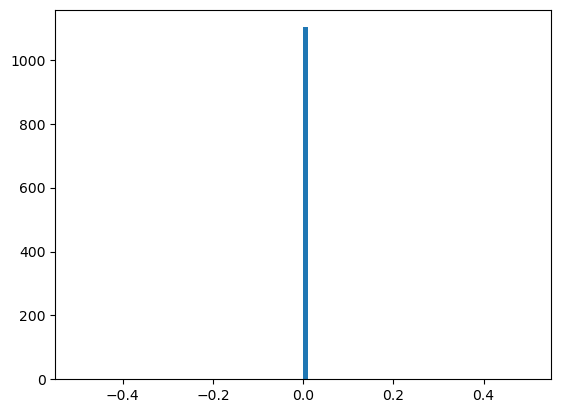

RGPPVRGGE
33
recurrence 1
mean 0.0018148820326678765
min 0.0
max 2.0
[0.0 0.0 0.0 ... 0.0 0.0 0.0]


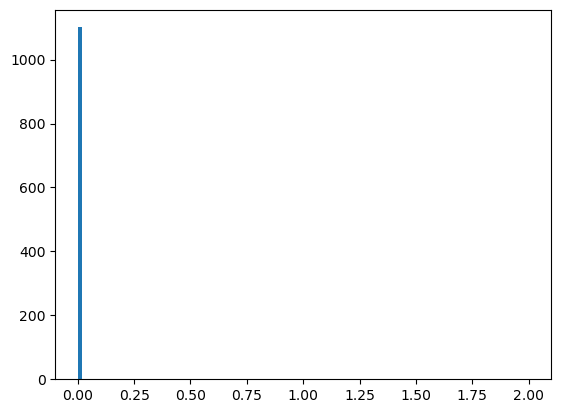

EDGSPNLSC
34
recurrence 1
mean 0.0018148820326678765
min 0.0
max 2.0
[0.0 0.0 0.0 ... 0.0 0.0 0.0]


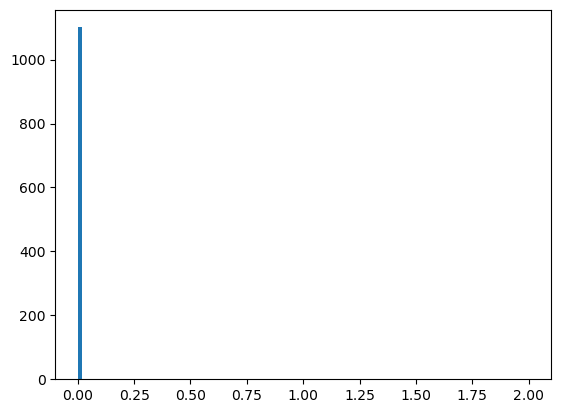

ERGPPVRGG
35
recurrence 1
mean 0.0018148820326678765
min 0.0
max 2.0
[0.0 0.0 0.0 ... 0.0 0.0 0.0]


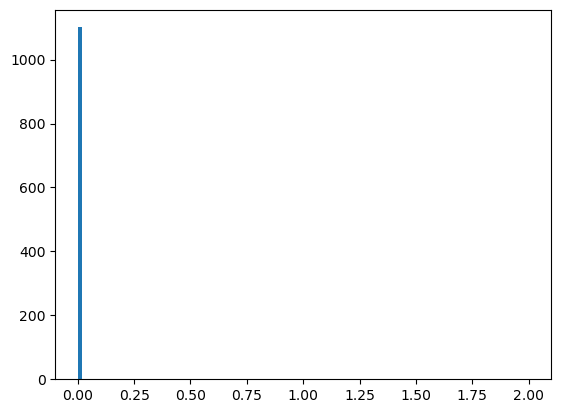

ERGPPVRGG
36
recurrence 1
mean 0.0018148820326678765
min 0.0
max 2.0
[0.0 0.0 0.0 ... 0.0 0.0 0.0]


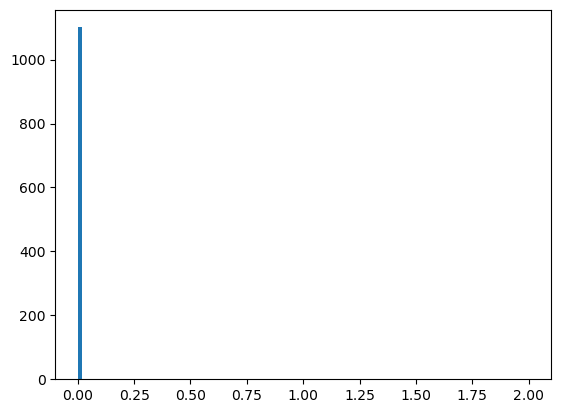

VRGGGRSAH
37
recurrence 1
mean 0.0018148820326678765
min 0.0
max 2.0
[0.0 0.0 0.0 ... 0.0 0.0 0.0]


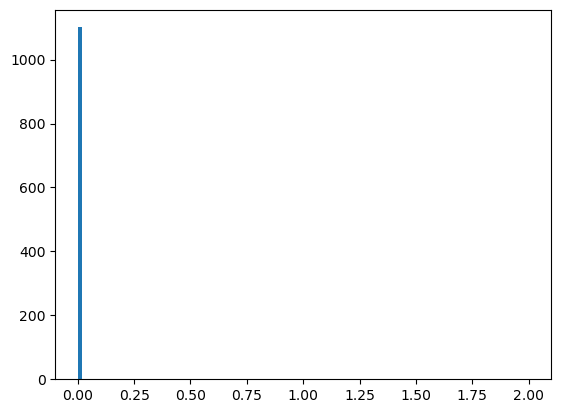

VSQIISLWM
38
recurrence 0
mean 0.0
min 0.0
max 0.0
[0.0 0.0 0.0 ... 0.0 0.0 0.0]


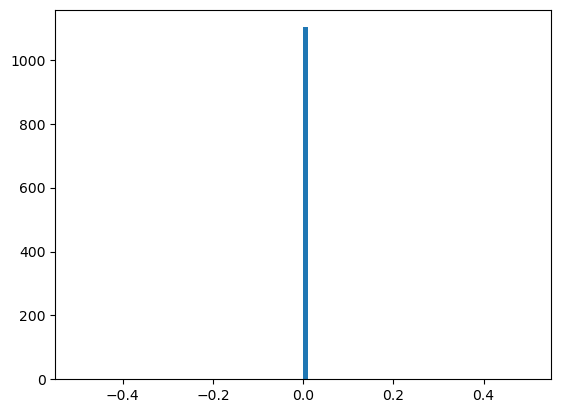

DGSPNLSCK
39
recurrence 1
mean 0.0018148820326678765
min 0.0
max 2.0
[0.0 0.0 0.0 ... 0.0 0.0 0.0]


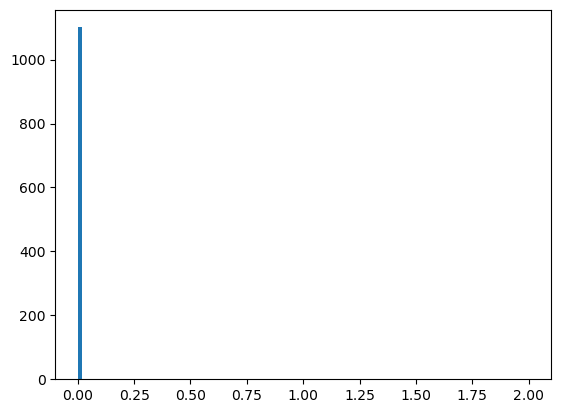

AERGPPVRG
40
recurrence 1
mean 0.0018148820326678765
min 0.0
max 2.0
[0.0 0.0 0.0 ... 0.0 0.0 0.0]


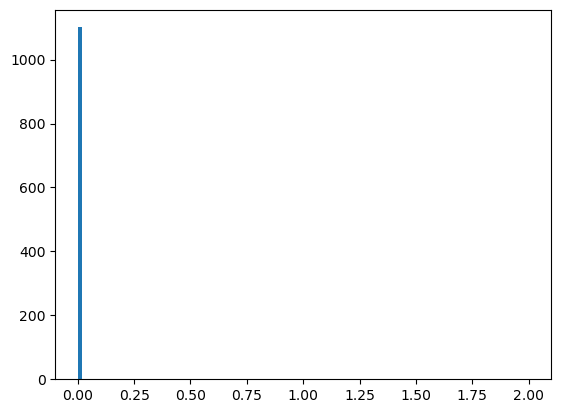

AERGPPVRG
41
recurrence 1
mean 0.0018148820326678765
min 0.0
max 2.0
[0.0 0.0 0.0 ... 0.0 0.0 0.0]


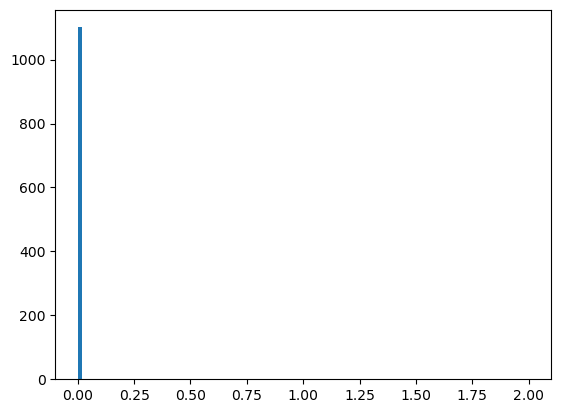

VRGGASPLL
42
recurrence 1
mean 0.0018148820326678765
min 0.0
max 2.0
[0.0 0.0 0.0 ... 0.0 0.0 0.0]


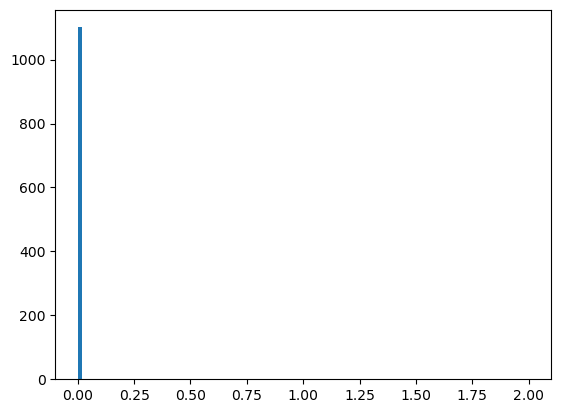

SPNLSCKTG
43
recurrence 1
mean 0.0018148820326678765
min 0.0
max 2.0
[0.0 0.0 0.0 ... 0.0 0.0 0.0]


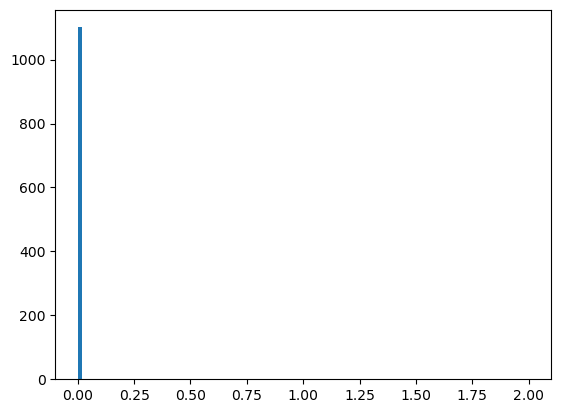

GPPVRGGGT
44
recurrence 0
mean 0.0
min 0.0
max 0.0
[0.0 0.0 0.0 ... 0.0 0.0 0.0]


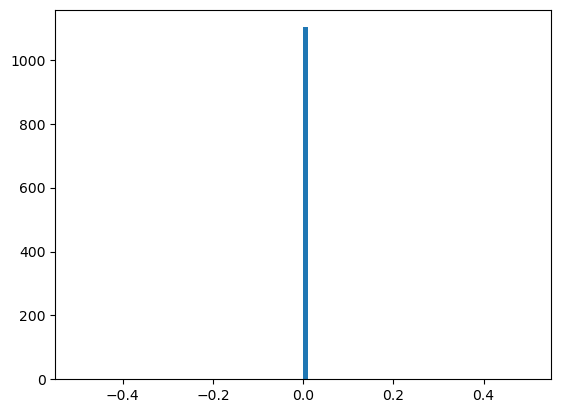

GPPVRGGGT
45
recurrence 0
mean 0.0
min 0.0
max 0.0
[0.0 0.0 0.0 ... 0.0 0.0 0.0]


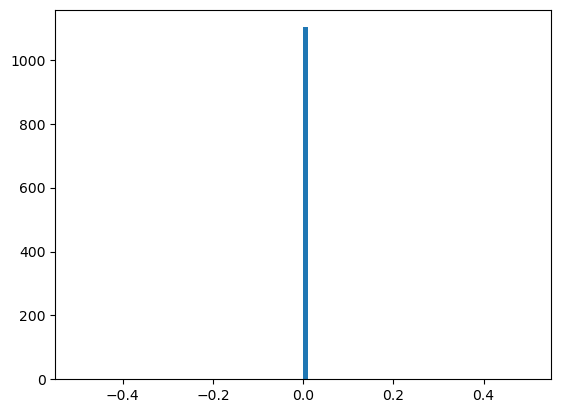

SQIISLWMW
46
recurrence 0
mean 0.0
min 0.0
max 0.0
[0.0 0.0 0.0 ... 0.0 0.0 0.0]


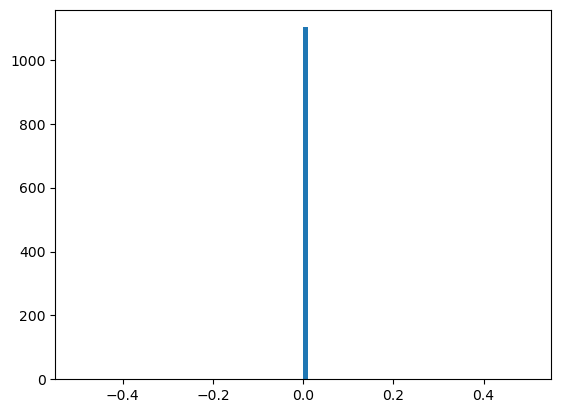

NLSCKTGCL
47
recurrence 1
mean 0.0018148820326678765
min 0.0
max 2.0
[0.0 0.0 0.0 ... 0.0 0.0 0.0]


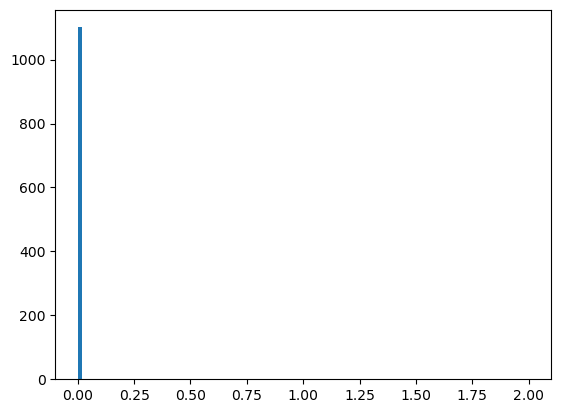

In [45]:
counter = 0 
for idx, row in res_filtered.iterrows():
    print(idx)
    counter+=1
    print(counter)
    test = row[brca_cols].values
    print('recurrence', sum(test > 0 ))
    print('mean', np.mean(test))
    print('min', np.min(test))
    print('max', np.max(test))
    print(test)
    if np.min(test) is not np.nan:
        plt.hist(row[brca_cols].values, bins = 100)
        plt.show()